<a href="https://colab.research.google.com/github/HQhanqiZHQ/DL_labs/blob/main/MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Networks

In [ ]:
# Import needed packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST Example
The MNIST data set includes handwritten digits with corresponding labels.
* Training set: 60,000 images of handwritten digits and corresponding labels. Each digit is represented as a 28 x 28 matrix of grayscale values 0 - 255. The entire training set is stored in a 3D tensor of shape (60000, 28, 28).
* The corresponding image values are stored as a 1D tensor of values 0 - 9. Testing set: 10,000 images with the same set up as the training set


In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Divide numbers by 255 to scale between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make labels into vectors of 0s and 1s
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


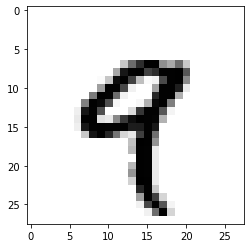

In [ ]:
# Let's take a look at one of the training examples
digit = x_train[4] # Randomly chose index 4
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
# Let's look at how many training examples we have
x_train.shape

(60000, 28, 28)

In [ ]:
# Define model
model = keras.Sequential([
  # Make 28x28 image a vector of length 28*28 = 784 with Flatten
  layers.Flatten(input_shape=(28, 28)),
  # Layer 1 (Hidden layer)
  layers.Dense(512, activation='relu'),
  # Layer 2 (Output layer)
  layers.Dense(10, activation='softmax')
])

# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the network
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.2662 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0718 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0519 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0384 - accuracy: 0.9886


In [ ]:
# Evaluate the model with test data
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0628 - accuracy: 0.9804 - 1s/epoch - 3ms/step


[0.06282875686883926, 0.980400025844574]

The first value of the output is the test set loss. The second value in the test set accuracy. We see we get a test set accuracy of around 97%. Note that this accuracy is slightly lower than the training set accuracy from the final epoch. This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. We'll cover this topic in a later lecture.



# IMDb Example
We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

If you want to see how to reverse code the above to see the original review, the code is below.

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 a nd 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

1. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the course).
2. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually.

In [ ]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

Here's what our samples look like now:

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

### Building the network
Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu'`)

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. Having 16 hidden units means that the weight matrix `W` will have shape (`input_dimension`, 16), i.e. the dot product with `W` will project the input data onto a 16-dimensional representation space (and then we would add the bias vector b and apply the `relu` operation). You can intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when learning internal representations". **Having more hidden units (a higher-dimensional representation space) allows your network to learn more complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data)**.

Here we will use an architecture consisting of two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. The intermediate layers will use `relu` as their activation function, and the final layer will use a `sigmoid` activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). A `relu` is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [ ]:
# Define model
model = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Layer 2 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

Finally, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a `sigmoid` activation), is it best to use the `binary_crossentropy` loss. It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But **crossentropy is usually the best choice when you are dealing with models that output probabilities**. Crossentropy is a quantity from the field of Information Theory, that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will also monitor accuracy during training.

In [ ]:
# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validation
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5746 - accuracy: 0.7675 - val_loss: 0.4467 - val_accuracy: 0.8502
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3667 - accuracy: 0.8848 - val_loss: 0.3435 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2703 - accuracy: 0.9129 - val_loss: 0.2941 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2172 - accuracy: 0.9289 - val_loss: 0.2899 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1790 - accuracy: 0.9412 - val_loss: 0.2890 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1513 - accuracy: 0.9514 - val_loss: 0.2988 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1289 - accuracy: 0.9598 - val_loss: 0.2986 - val_accuracy: 0.8837
Epoch 8/20
30

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training. It contains 4 entries: one per metric that was being monitored, during training and during validation.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training and validation loss side by side, as well as the training and validation accuracy:

In [ ]:
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

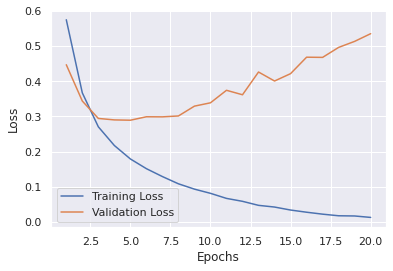

In [ ]:
plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

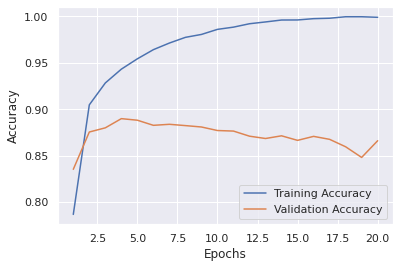

In [ ]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after four epochs. In general, there is a range of techniques you can leverage to mitigate overfitting, which we will cover next.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [ ]:
# Define model
model = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Layer 2 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.5544 - accuracy: 0.7427
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2735 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2009 - accuracy: 0.9322
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8715


In [ ]:
results

[0.32440364360809326, 0.8714799880981445]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

### Regularization
It's clear the model is overfitting. How can we mitigate this? We'll cover 3 ways:
1. Reduce network size
2. Weight regularization
3. Dropout

#### Reduce network size
One quick way to reduce the complexity of a model is to reduce it's size by decreasing the number of hidden nodes in one or more hidden layers. Let's reduce our number from 16 to 4 and see how it performs.


In [ ]:
# Define model
model2 = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(4, activation='relu'),
  # Layer 2 (Hidden layer)
  layers.Dense(4, activation='relu'),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6543 - accuracy: 0.6049 - val_loss: 0.5362 - val_accuracy: 0.7657
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4860 - accuracy: 0.8488 - val_loss: 0.4534 - val_accuracy: 0.8543
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3979 - accuracy: 0.9039 - val_loss: 0.3917 - val_accuracy: 0.8702
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3232 - accuracy: 0.9295 - val_loss: 0.3446 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2674 - accuracy: 0.9411 - val_loss: 0.3152 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2202 - accuracy: 0.9527 - val_loss: 0.3022 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1895 - accuracy: 0.9548 - val_loss: 0.2784 - val_accuracy: 0.8890
Epoch 8/20
30

In [ ]:
import seaborn as sns
sns.set()

train_acc2  = history2.history['accuracy']
train_loss2 = history2.history['loss']
val_acc2  = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

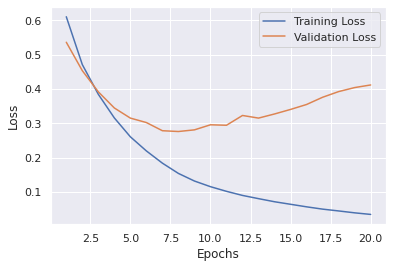

In [ ]:
plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

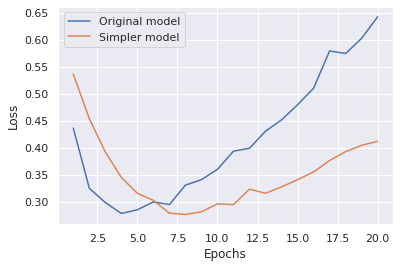

In [ ]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_loss2, label = 'Simpler model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The smaller network performs better than the original model - it starts to overfit around epoch 10 rather than epoch 5. These values are when the validation loss starts to increase.

What happens if we make the model more complex by incrasing 16 to 512?

In [ ]:
# Define model
model3 = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(512, activation='relu'),
  # Layer 2 (Hidden layer)
  layers.Dense(512, activation='relu'),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 296ms/step - loss: 0.7102 - accuracy: 0.6653 - val_loss: 0.3100 - val_accuracy: 0.8828
Epoch 2/20
30/30 [==============================] - 8s 268ms/step - loss: 0.2607 - accuracy: 0.9014 - val_loss: 0.3674 - val_accuracy: 0.8416
Epoch 3/20
30/30 [==============================] - 8s 269ms/step - loss: 0.1532 - accuracy: 0.9427 - val_loss: 0.3778 - val_accuracy: 0.8667
Epoch 4/20
30/30 [==============================] - 8s 268ms/step - loss: 0.0605 - accuracy: 0.9787 - val_loss: 0.3519 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 8s 269ms/step - loss: 0.0340 - accuracy: 0.9925 - val_loss: 0.3072 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 8s 268ms/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 0.4917 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 8s 271ms/step - loss: 7.0104e-04 - accuracy: 1.0000 - val_loss: 0.6115 - val_accuracy: 0.8872
E

In [ ]:
train_acc3  = history3.history['accuracy']
train_loss3 = history3.history['loss']
val_acc3  = history3.history['val_accuracy']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(train_acc3) + 1)

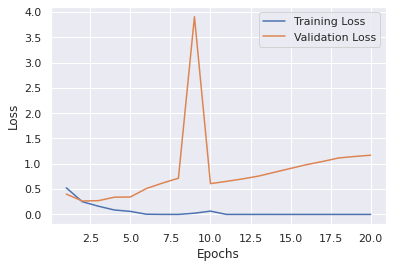

In [ ]:
plt.plot(epochs, train_loss3, label = 'Training Loss')
plt.plot(epochs, val_loss3, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

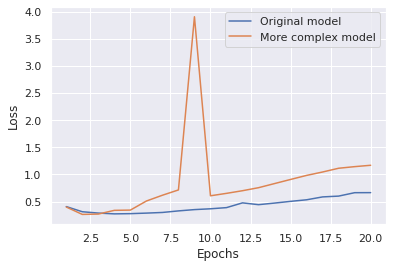

In [ ]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_loss3, label = 'More complex model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The original model performs better than the more complex model with many more hidden nodes.

#### Weight regularization

You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization to our movie review classification network.

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add 0.001 * `weight_coefficient_value` to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.


In [ ]:
# L2 model
l2_model = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(16, activation='relu',
                   kernel_regularizer = keras.regularizers.l2(0.001)),
  # Layer 2 (Hidden layer)
  layers.Dense(16, activation='relu',
                   kernel_regularizer = keras.regularizers.l2(0.001)),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 71ms/step - loss: 0.6176 - accuracy: 0.7145 - val_loss: 0.3949 - val_accuracy: 0.8731
Epoch 2/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3365 - accuracy: 0.8991 - val_loss: 0.3348 - val_accuracy: 0.8890
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2693 - accuracy: 0.9236 - val_loss: 0.3284 - val_accuracy: 0.8888
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2420 - accuracy: 0.9321 - val_loss: 0.3491 - val_accuracy: 0.8804
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2285 - accuracy: 0.9388 - val_loss: 0.3553 - val_accuracy: 0.8775
Epoch 6/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2226 - accuracy: 0.9407 - val_loss: 0.3471 - val_accuracy: 0.8812
Epoch 7/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2107 - accuracy: 0.9456 - val_loss: 0.3575 - val_accuracy: 0.8802
Epoch 8/20
49

In [ ]:
train_accl2  = l2_model_hist.history['accuracy']
train_lossl2 = l2_model_hist.history['loss']
val_accl2  = l2_model_hist.history['val_accuracy']
val_lossl2 = l2_model_hist.history['val_loss']

epochs = range(1, len(train_accl2) + 1)

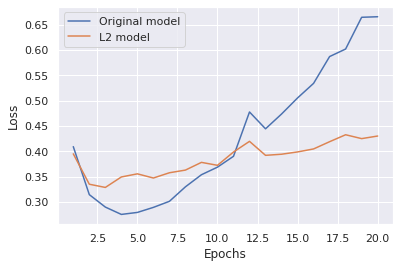

In [ ]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_lossl2, label = 'L2 model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The model with L2 regularization (orange line) has become much more resistant to overfitting than the reference model (blue line), even though both models have the same number of parameters.

#### Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among other things, by a fraud prevention mechanism used by banks -- in his own words: "I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting".

**The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant** (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present.

In Keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before it:


In [ ]:
# Dropout model
dmodel = keras.Sequential([
  # Layer 1 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Dropout layer
  layers.Dropout(0.5),
  # Layer 2 (Hidden layer)
  layers.Dense(16, activation='relu'),
  # Dropout layer
  layers.Dropout(0.5),
  # Layer 3 (Output layer)
  layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
dmodel.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
d_model_hist = dmodel.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 64ms/step - loss: 0.6382 - accuracy: 0.6201 - val_loss: 0.4445 - val_accuracy: 0.8568
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.4647 - accuracy: 0.7908 - val_loss: 0.3321 - val_accuracy: 0.8822
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3590 - accuracy: 0.8567 - val_loss: 0.2917 - val_accuracy: 0.8870
Epoch 4/20
49/49 [==============================] - 2s 48ms/step - loss: 0.3012 - accuracy: 0.8906 - val_loss: 0.2767 - val_accuracy: 0.8890
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2682 - accuracy: 0.9077 - val_loss: 0.2936 - val_accuracy: 0.8831
Epoch 6/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2248 - accuracy: 0.9241 - val_loss: 0.2865 - val_accuracy: 0.8886
Epoch 7/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2050 - accuracy: 0.9315 - val_loss: 0.3101 - val_accuracy: 0.8871
Epoch 8/20
49

In [ ]:
train_accd  = d_model_hist.history['accuracy']
train_lossd = d_model_hist.history['loss']
val_accd  = d_model_hist.history['val_accuracy']
val_lossd = d_model_hist.history['val_loss']

epochs = range(1, len(train_accl2) + 1)

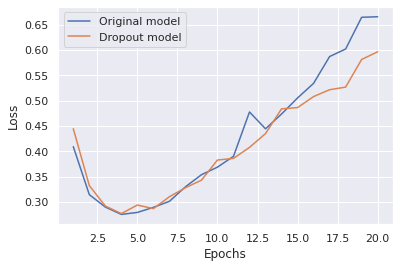

In [ ]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_lossd, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

A slight improvement over the original network in terms of overfitting, but not as good as the L2 model.

Summary: the most common ways to prevent overfitting in neural networks:

1. Getting more training data.
2. Reducing the capacity of the network.
3. Adding weight regularization.
4. Adding dropout.